**Jacqueline Bumler: 21229622, Leonardo Bocchi**

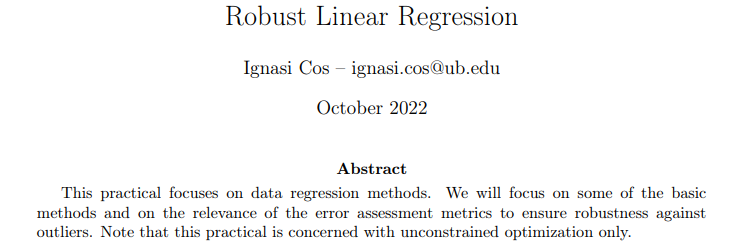

# **Ex.1 - Introduction**

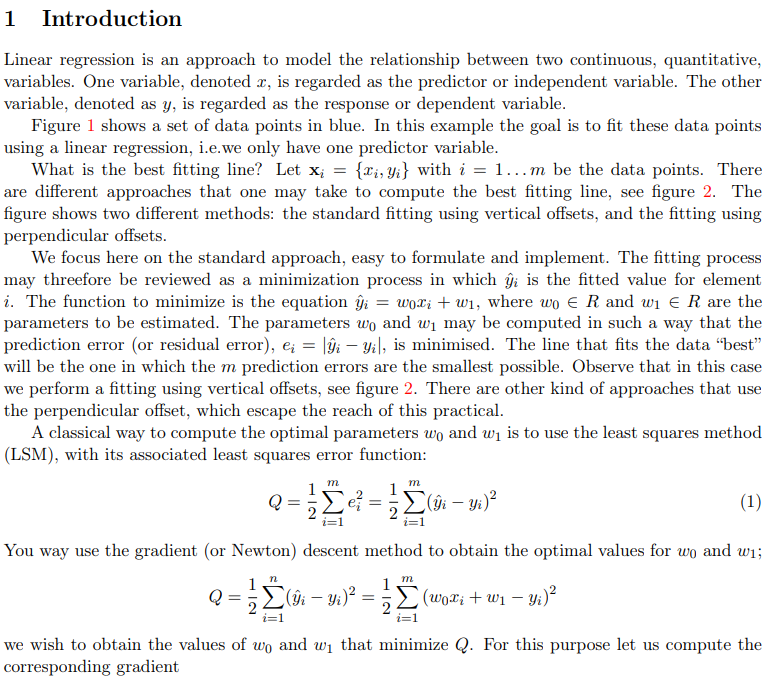

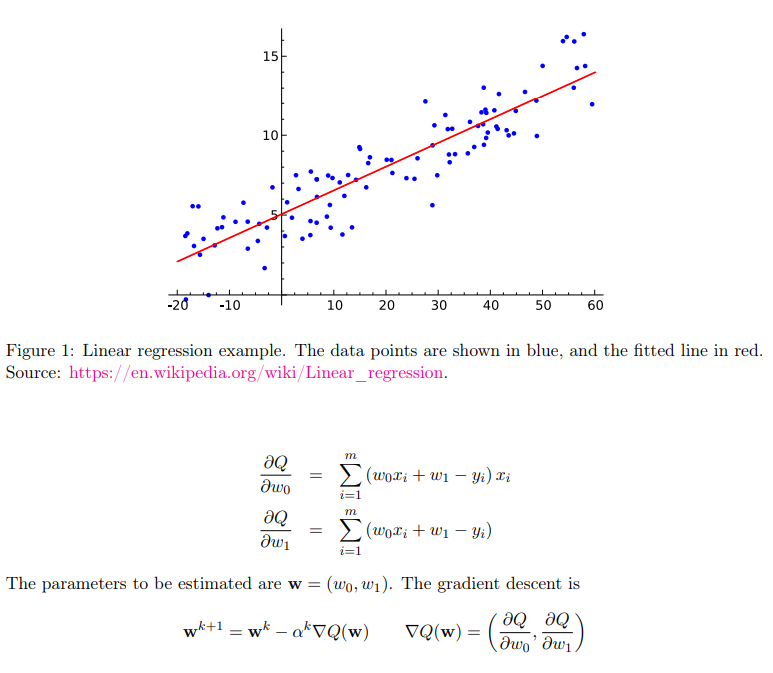

## Introduction - part 1

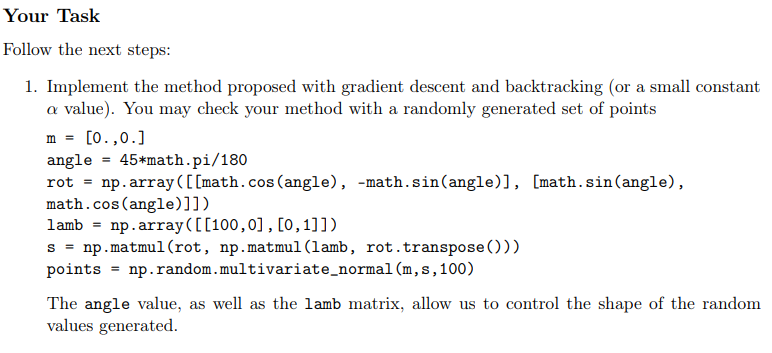

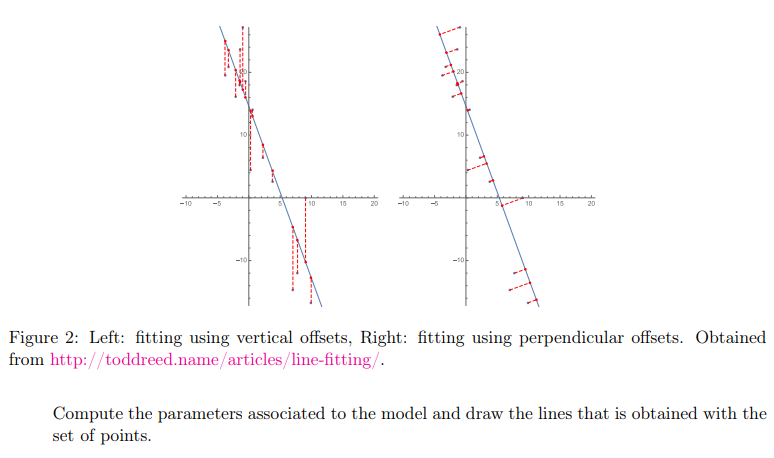

Text(0.5, 1.0, 'Dataset: linearly generated point cloud w/ noise')

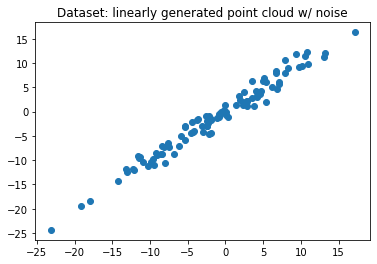

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = [0.,0.]
angle = 45*np.pi/180
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),
np.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
np.random.seed(32)    # Added for reproducibility
points = np.random.multivariate_normal(m,s,100)

x = np.zeros(points.shape[0])
y = np.zeros(points.shape[0])
for i in range(0, len(points)):
  x[i] = points[i][0]
  y[i] = points[i][1]

x = x.reshape([100,1])      # Make sure they are column vectors 
y = y.reshape([100,1])

plt.scatter(x, y)
plt.title("Dataset: linearly generated point cloud w/ noise")

In [ ]:
# Defining the loss function, in this case mean squared errors -----------------
def Q(w):
  return 1/2*(np.sum((w[0]*x + w[1]*np.ones([len(x),1]) - y)**2))

# Defining the gradient of the function to minimize (loss function) ------------
def gradient_Q(w):
  res = np.zeros([2,1])
  res[0] = np.dot(x.T, w[0]*x + w[1]*np.ones([len(x),1]) - y)
  res[1] = np.sum(w[0]*x + w[1]*np.ones([len(x),1]) - y)
  return res 

In [ ]:
# Define the gradient descent method -------------------------------------------
def grad_des_LSE(w0=np.random.randn(2).reshape([2,1]), tol=1e-5):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """

  wk = np.zeros([2,1])
  wk[:,[0]] = w0        
  k = 0

  grad = gradient_Q(wk[:,[k]])    # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Q(wk[:,[k+1]]) > Q(wk[:,[k]]):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
  k = k+1

  while np.sqrt(grad[0]**2+grad[1]**2)>tol and np.abs(Q(wk[:,[k]])-Q(wk[:,[k-1]]))>tol:     # Iterations of the method till stop criteria are satisfied
    grad = gradient_Q(wk[:,[k]])
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Q(wk[:,[k+1]]) > Q(wk[:,[k]]):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
    k = k+1

  return wk, k

Text(0.5, 1.0, 'Linear Regression w/ LSE')

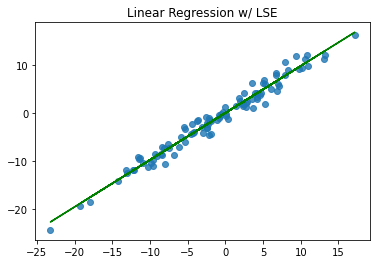

In [ ]:
# Run the method to get the optimal weights ------------------------------------
wk, k = grad_des_LSE()

plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk[0,-1]*x+wk[1,-1], c='g')
plt.title("Linear Regression w/ LSE")

## Introduction - part 2

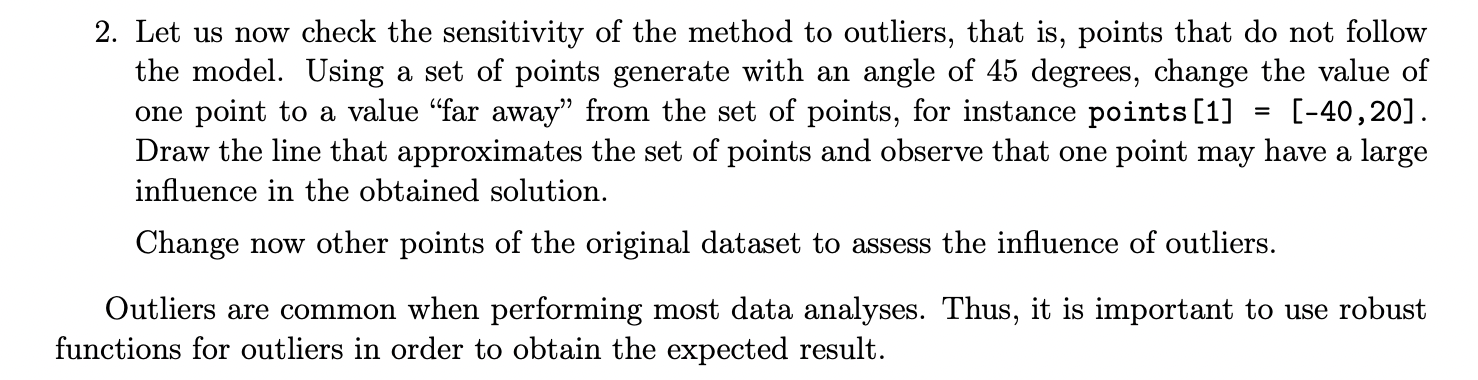

Text(0.5, 1.0, 'Dataset with 1 outlier')

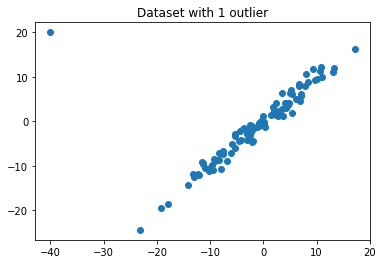

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_no = np.copy(x)          # Store the values of the dataset with no outliers
y_no = np.copy(y)          # These will be used later in the following sections

points[1] = [-40, 20]
x[1] = -40
y[1] = 20
plt.scatter(x, y)
plt.title("Dataset with 1 outlier")

Text(0.5, 1.0, 'Linear regression on the dataset with 1 outlier')

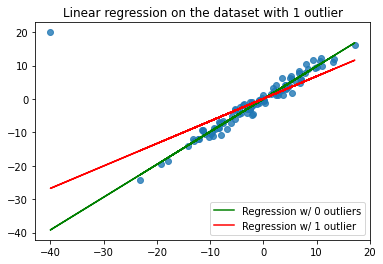

In [ ]:
wk_old = np.copy(wk)               # Store the weights obtained with no outliers

# Run the method to get the optimal weights ------------------------------------
wk, k = grad_des_LSE()

# Plot the result of the regression --------------------------------------------
plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk_old[0,-1]*x+wk_old[1,-1], c='g', label="Regression w/ 0 outliers")
plt.plot(x, wk[0,-1]*x+wk[1,-1], c='r', label="Regression w/ 1 outlier")
plt.legend()
plt.title("Linear regression on the dataset with 1 outlier")

OBSERVATION: The green line is the linear regression obtained in the absence of any outlier. The red one is the linear regression obtained with only one outlier (out of 100 samples). The linear regression with the presence of only one outlier is clearly not a good approximation of the distribution, and it is quite different than the previous approximation. 

Let's now see what happens with more outliers present in the sample:

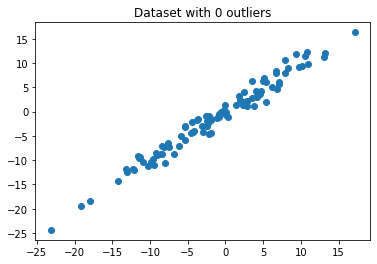

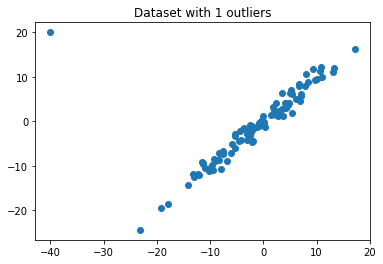

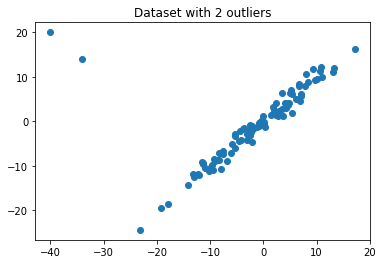

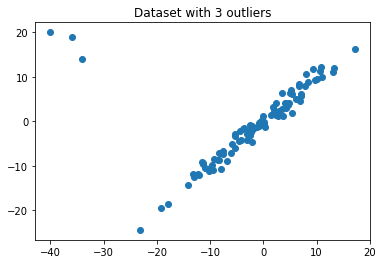

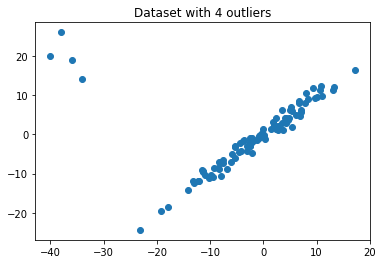

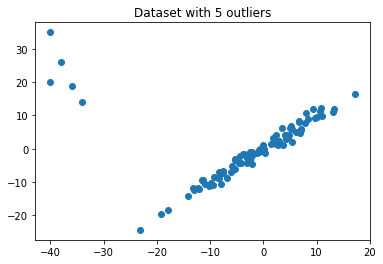

In [ ]:
# Generate more outliers in the dataset ----------------------------------------
N = 5                         # Number of points changed to outliers 
n = int(len(x)/(N+1))             

X = np.zeros([len(x),N+1])      # Initiate matrices to store the values of the dataset for different numbers of outliers
Y = np.zeros([len(y),N+1])      # The j-th column will correspond to the coordinates of the dateset with i outliers

X[:,[0]] = x_no         # The original dataset with no outliers
Y[:,[0]] = y_no
X[:,[1]] = x            # The current dataset with one outlier
Y[:,[1]] = y

plt.figure()
plt.scatter(X[:,[0]], Y[:,[0]])
plt.title("Dataset with 0 outliers")
plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]])
plt.title("Dataset with 1 outliers")

for j in range(2, N+1):
  x[j*n] = -30 - 2*j 
  y[j*n] = 10 + (j**2)
  X[:,[j]] = x
  Y[:,[j]] = y

  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

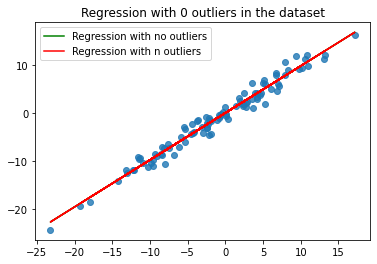

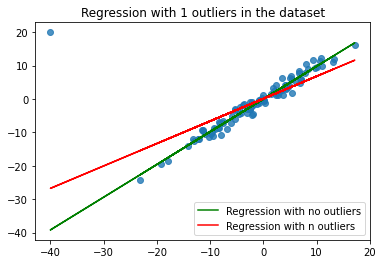

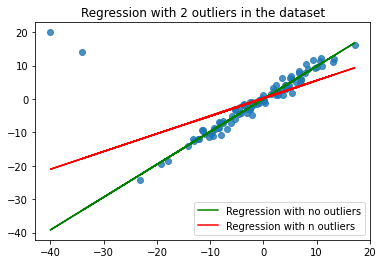

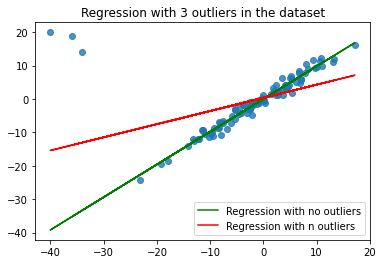

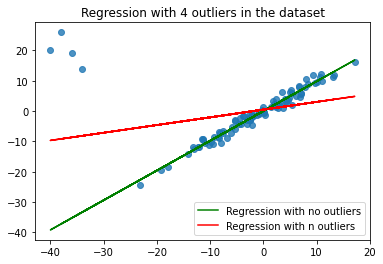

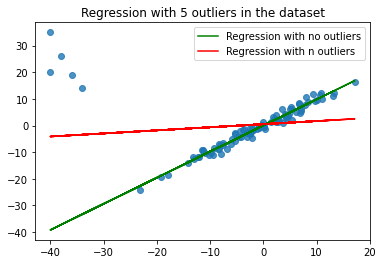

In [ ]:
for j in range(0, X.shape[1]):
  # Use the dataset with j outliers --------------------------------------------
  x = X[:,[j]]
  y = Y[:,[j]]

  # Run the method to get the optimal weights ----------------------------------
  wk, k = grad_des_LSE()

  # Plot the result of the regression ------------------------------------------
  plt.figure()
  plt.scatter(x, y, alpha=0.8)
  plt.plot(x, wk_old[0,-1]*x+wk_old[1,-1], c='g', label="Regression with no outliers")
  plt.plot(x, wk[0,-1]*x+wk[1,-1], c='r', label="Regression with n outliers")
  plt.title("Regression with " + str(j) + " outliers in the dataset")
  plt.legend()

OBSERVATION: The red line is the linear regression with n outliers. It is clear that as n increases and there are more outliers in the data set, the linear regression is not as successful at approximating the generated distribution. 

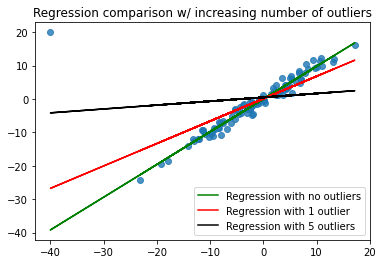

In [ ]:
# Run the method to get the optimal weights ------------------------------------
x = X[:,[0]]
y = Y[:,[0]]
wk_no, k_no = grad_des_LSE()
x = X[:,[1]]
y = Y[:,[1]]
wk_one, k_one = grad_des_LSE()

# Plot the result of the regression --------------------------------------------
plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk_no[0,-1]*x+wk_no[1,-1], c='g', label="Regression with no outliers")
plt.plot(x, wk_one[0,-1]*x+wk_one[1,-1], c='r', label="Regression with 1 outlier")
plt.plot(x, wk[0,-1]*x+wk[1,-1], c='k', label="Regression with 5 outliers")
plt.title("Regression comparison w/ increasing number of outliers")
plt.legend()

OBSERVATION: Finally we visualize the result comparing the regression with five outliers (the black line), the regression with one outlier (the red line), and the regression with no outliers (the green line). With only five outliers present, we can clearly observe how much the approximation deviates from a good fit of the generated distribution. 

# **Ex.2 - Robust functions**

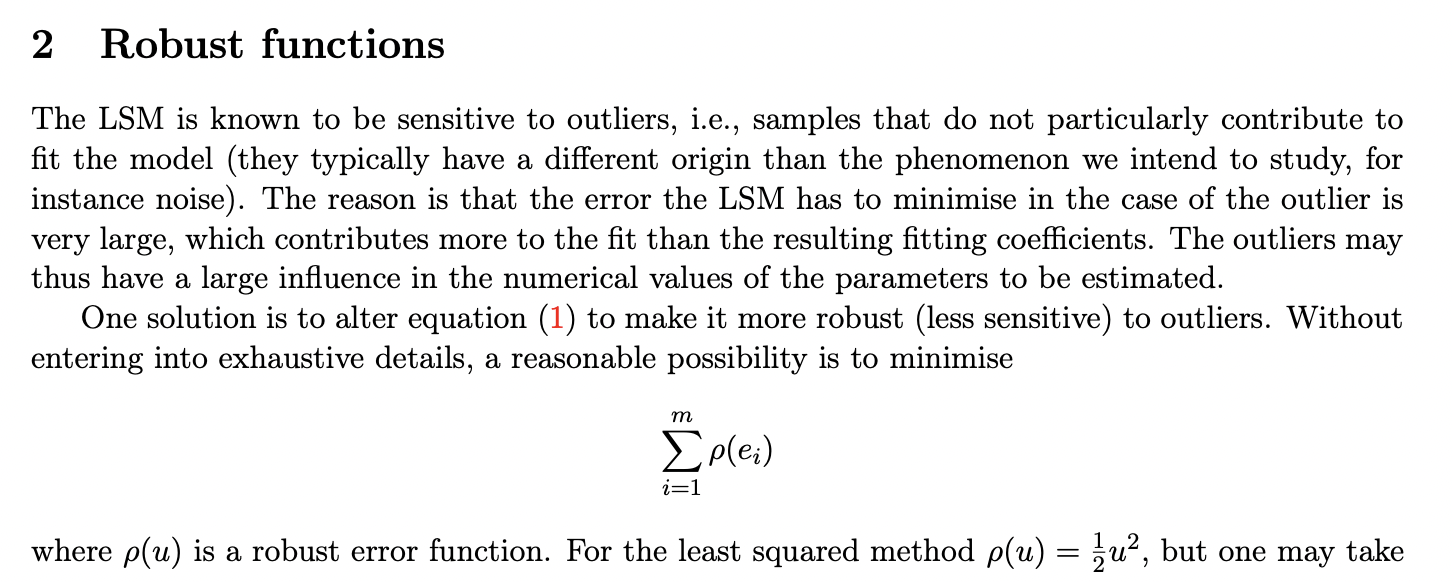

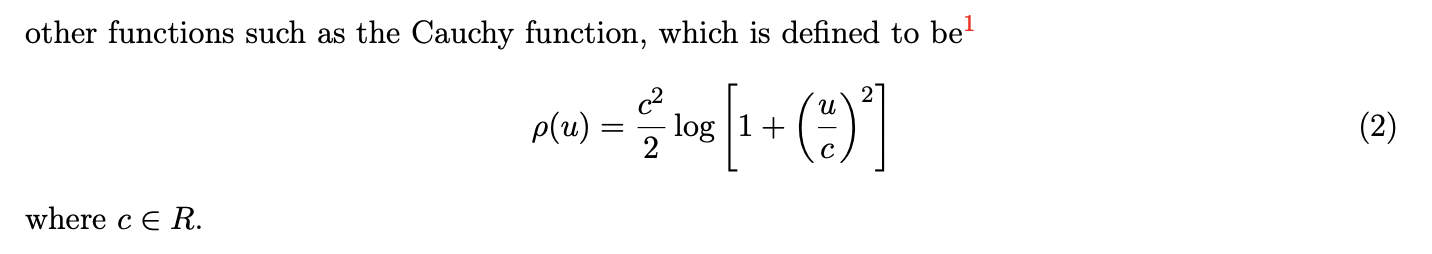

## Robust functions - part 1

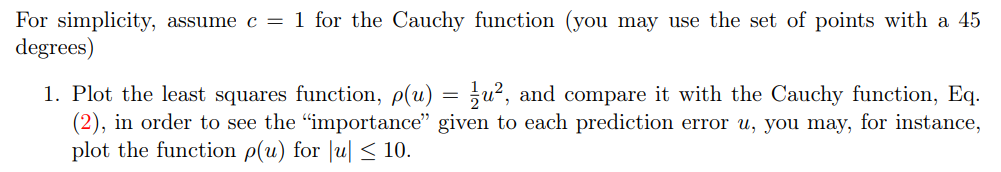

In [ ]:
import numpy as np

# Defining functions -----------------------------------------------------------
def LSE_aux(u): 
  return 1/2*(u**2)

def Cauchy_aux(u, c=1):
  return (c**2)/2*np.log(1 + (u/c)**2)

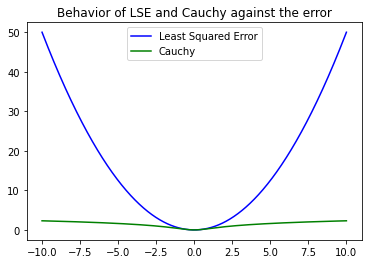

In [ ]:
import matplotlib.pyplot as plt

# Generate points to plot the functions ----------------------------------------
ulim = 10
u = np.linspace(-ulim, ulim, 1000)

# Plot the functions -----------------------------------------------------------
plt.figure()
plt.plot(u, LSE_aux(u), c='b')
plt.plot(u, Cauchy_aux(u, 1), c='g')
plt.title("Behavior of LSE and Cauchy against the error")
plt.legend(['Least Squared Error', 'Cauchy'])

OBSERVATION: As we can observe from the plot, when the absolute value of our input values increases, the Cauchy function gives smaller outputs compared to the least squares function. This will allow us to reduce the weight of the outliers for the loss function.

## Robust functions - part 2

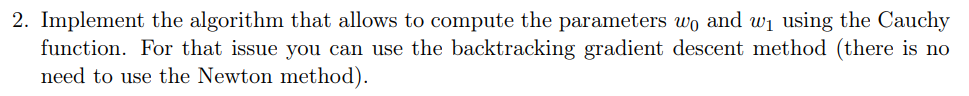

Text(0.5, 1.0, 'Dataset: linearly generated point cloud w/ noise')

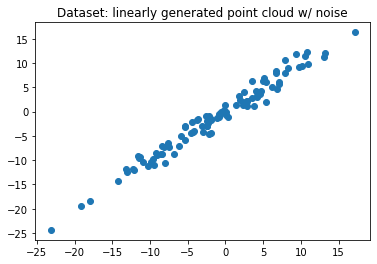

In [ ]:
import matplotlib.pyplot as plt

m = [0.,0.]
angle = 45*np.pi/180
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),
np.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
np.random.seed(32)    # Added for reproducibility
points = np.random.multivariate_normal(m,s,100)

x = np.zeros(points.shape[0])
y = np.zeros(points.shape[0])
for i in range(0, len(points)):
  x[i] = points[i][0]
  y[i] = points[i][1]

x = x.reshape([100,1])      # Make sure they are column vectors 
y = y.reshape([100,1])

plt.scatter(x, y)
plt.title("Dataset: linearly generated point cloud w/ noise")

In [ ]:
'''
# Define the Cauchy function ---------------------------------------------------
def Cauchy(w, c=1):
  return (c**2)/2*np.sum( np.log(np.ones([len(x),1]) + ((w[0]*x + w[1]*np.ones([len(x),1]) - y)/c)**2) )

# Define the gradient of the Cauchy function -----------------------------------
def gradient_C(w, c=1):
  grad = np.zeros([2,1])
  grad[0] = (c**2)*np.sum( np.dot(x.T, w[0]*x + w[1]*np.ones([len(x),1]) - y)/((c**2)*np.ones([len(x),1]) + (w[0]*x + w[1]*np.ones([len(x),1]) - y)**2) )
  grad[1] = (c**2)*np.sum( (w[0]*x + w[1]*np.ones([len(x),1]) - y)/((c**2)*np.ones([len(x),1]) + (w[0]*x + w[1]*np.ones([len(x),1]) - y)**2) )
  return grad
'''

# Define the Cauchy function ---------------------------------------------------
def Cauchy(w, c=1):
  return (c**2/2)*np.sum(np.log(1+((w[0]*x+w[1]-y)/c)**2))

# Define the gradient of the Cauchy function -----------------------------------
def gradient_C(w, c=1):
  grad = np.zeros([2,1])
  grad[0] = c**2 * np.sum((1+((w[0]*x+w[1]-y)/c)**2)**(-1)*(w[0]*x+w[1]-y)/(c**2)*x)
  grad[1] = c**2 * np.sum((1+((w[0]*x+w[1]-y)/c)**2)**(-1)*(w[0]*x+w[1]-y)/(c**2))
  return grad


# Defining the loss function, in this case mean squared errors -----------------
def Q(w):
  return 1/2*(np.sum((w[0]*x + w[1]*np.ones([len(x),1]) - y)**2))

# Defining the gradient of the function to minimize (loss function) ------------
def gradient_Q(w):
  res = np.zeros([2,1])
  res[0] = np.dot(x.T, w[0]*x + w[1]*np.ones([len(x),1]) - y)
  res[1] = np.sum(w[0]*x + w[1]*np.ones([len(x),1]) - y)
  return res 

# Define the gradient descent method with Cauchy -------------------------------
def grad_des_Cauchy(w0=np.random.randn(2).reshape([2,1]), tol=1e-5, c=1, x=None, y=None):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """

  wk = np.zeros([2,1])
  wk[:,[0]] = w0
  k = 0

  grad = gradient_C(wk[:,[k]], c)     # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Cauchy(wk[:,[k+1]], c) > Cauchy(wk[:,[k]], c):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
  k = k+1
  grad = gradient_C(wk[:,[k]], c)     # Update the gradient


  while np.sqrt(grad[0]**2+grad[1]**2)>tol and np.abs(Cauchy(wk[:,[k]], c)-Cauchy(wk[:,[k-1]], c))>tol:
    grad = gradient_C(wk[:,[k]], c)
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Cauchy(wk[:,[k+1]], c) > Cauchy(wk[:,[k]], c):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased

    k = k+1
    
  return wk, k

# Define the gradient descent method with LSE ----------------------------------
def grad_des_LSE(w0=np.random.randn(2).reshape([2,1]), tol=1e-5):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """

  wk = np.zeros([2,1])
  wk[:,[0]] = w0
  k = 0

  grad = gradient_Q(wk[:,[k]])        # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Q(wk[:,[k+1]]) > Q(wk[:,[k]]):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
  k = k+1
  grad = gradient_Q(wk[:,[k]])        # Update the gradient

  while np.sqrt(grad[0]**2+grad[1]**2)>tol and np.abs(Q(wk[:,[k]])-Q(wk[:,[k-1]]))>tol:
    grad = gradient_Q(wk[:,[k]])
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Q(wk[:,[k+1]]) > Q(wk[:,[k]]):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased

    k = k+1

  return wk, k

## Robust functions - part 3

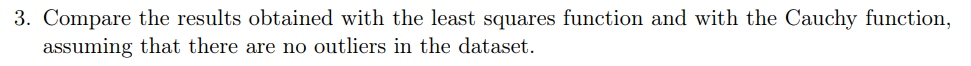

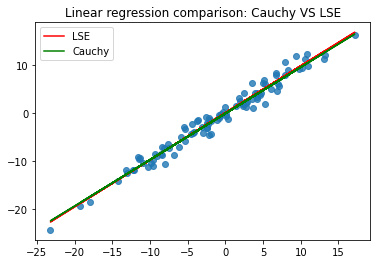

In [ ]:
# Run the method to get the optimal weights ------------------------------------
wk1, k1 = grad_des_LSE()
wk2, k2 = grad_des_Cauchy()

plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
plt.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
plt.title("Linear regression comparison: Cauchy VS LSE")
plt.legend()

In [ ]:
print("The following are the weights obtained using LSE: " + str(wk1[0,-1]) + ", " + str(wk1[1,-1]))
print("The following are the weights obtained using Cauchy: " + str(wk2[0,-1]) + ", " + str(wk2[1,-1]))

The following are the weights obtained using LSE: 0.9798728373456816, 0.015458684007613327
The following are the weights obtained using Cauchy: 0.9648989594927299, -0.10501850425062288


OBSERVATION: If no outliers are present in the data set, the obtained results of the regressions using the Cauchy function and the least squares function are almost exactly the same. Both loss functions give us a good approximation of the distribution.

## Robust functions - part 4

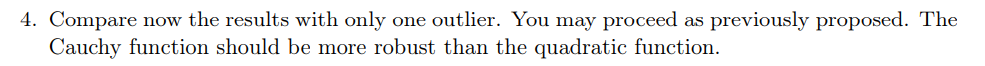

Text(0.5, 1.0, 'Dataset with 1 outlier')

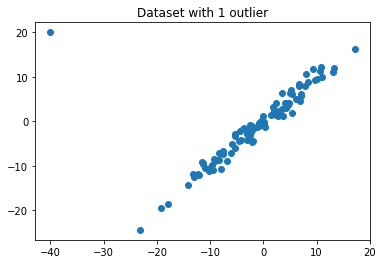

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_no = np.copy(x)          # Store the values of the dataset with no outliers
y_no = np.copy(y)          # These will be used later in the following sections

# Change the values of one of the points to be an outlier ----------------------
points[1] = [-40, 20]
x[1] = -40
y[1] = 20
plt.scatter(x, y)
plt.title("Dataset with 1 outlier")

In [ ]:
# Save the weights previously obstained with no outliers -----------------------
wk1_no = np.copy(wk1)
wk2_no = np.copy(wk2)

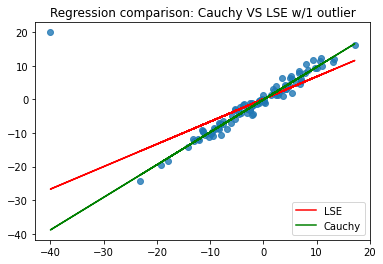

In [ ]:
# Run the method to get the optimal weights ------------------------------------
wk1, k1 = grad_des_LSE()
wk2, k2 = grad_des_Cauchy()

plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
plt.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
plt.title("Regression comparison: Cauchy VS LSE w/1 outlier")
plt.legend()

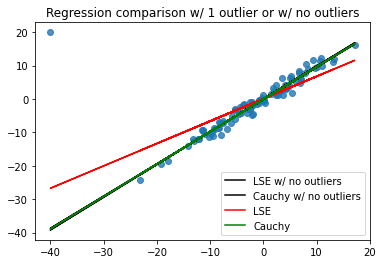

In [ ]:
# Compare the results of the previous regression w/ the one w/ no outliers -----
plt.figure()
plt.scatter(x, y, alpha=0.8)
plt.plot(x, wk1_no[0,-1]*x+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
plt.plot(x, wk2_no[0,-1]*x+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
plt.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
plt.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
plt.title("Regression comparison w/ 1 outlier or w/ no outliers")
plt.legend()

OBSERVATIONS: </br>
*   The regression obtained using LSE with only one outlier present in the data set (the red line) does not approximate the distribution well. On the other hand, the regression obtained using the Cauchy fucntion (the green line) is much closer to the one obtained with no outliers. Thus, we see that the Cauchy function still approximates the distribution well even with one outlier. 
*   Considering the case when one outlier is present, the linear regression with Cauchy's function is clearly more robust and less sensitive to the presence of the given outlier. 

## Robust functions - part 5

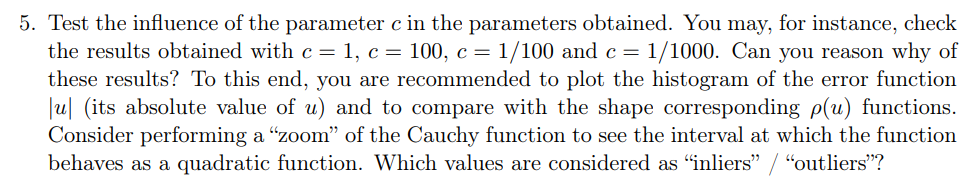

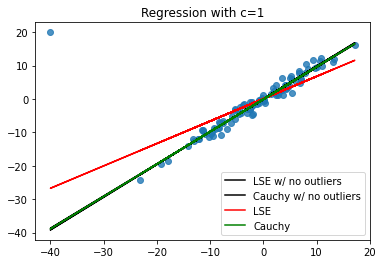

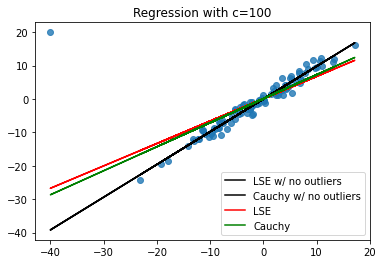

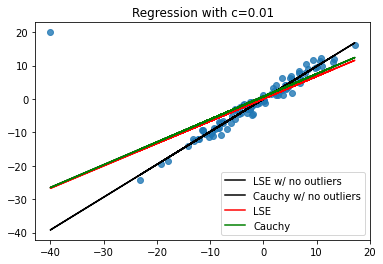

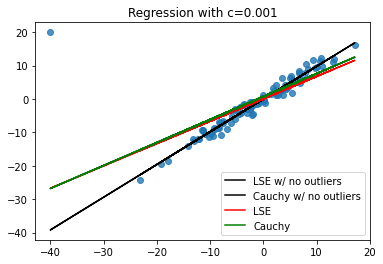

In [ ]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1, 100, 1/100, 1/1000]         

for i in range(0, len(c)):
  # Run the method on the dataset with no outliers -----------------------------
  x = np.copy(x_no)
  y = np.copy(y_no)

  wk1_no, k1_no = grad_des_LSE()
  wk2_no, k2_no = grad_des_Cauchy(c=c[i])

  # Change the values of one of the points to be an outlier --------------------
  points[1] = [-40, 20]
  x[1] = -40
  y[1] = 20

  # Run the method on  the dataset with one outlier ----------------------------
  wk1, k1 = grad_des_LSE()
  wk2, k2 = grad_des_Cauchy(c=c[i])

  # Plot the obtained regression -----------------------------------------------
  plt.figure()
  plt.scatter(x, y, alpha=0.8)
  plt.plot(x, wk1_no[0,-1]*x+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  plt.plot(x, wk2_no[0,-1]*x+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  plt.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
  plt.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
  plt.title("Regression with c=" + str(c[i]))
  plt.legend()

OBSERVATIONS: </br>
*   From the previous plots of the obtained linear regressions it's clear the parameter c of the Cauchy function has an important influence on its robustness in the presence of one outlier. By increasing the c value to 100, it deviated from the actual distribution much more than when c was set equal to 1. 
*   In order to better understand the effect of different values of the parameter c on the method's robustness, we can plot the behavior of the Cauchy function compared to the least squares method for different values of the error. This will be done in the following section.

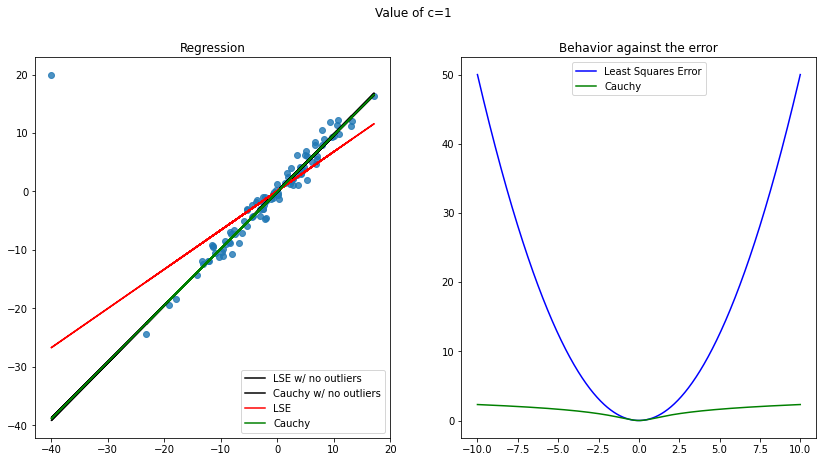

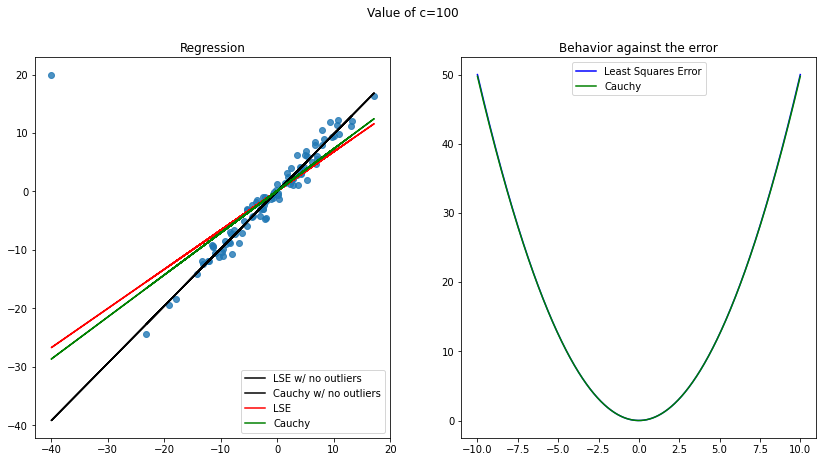

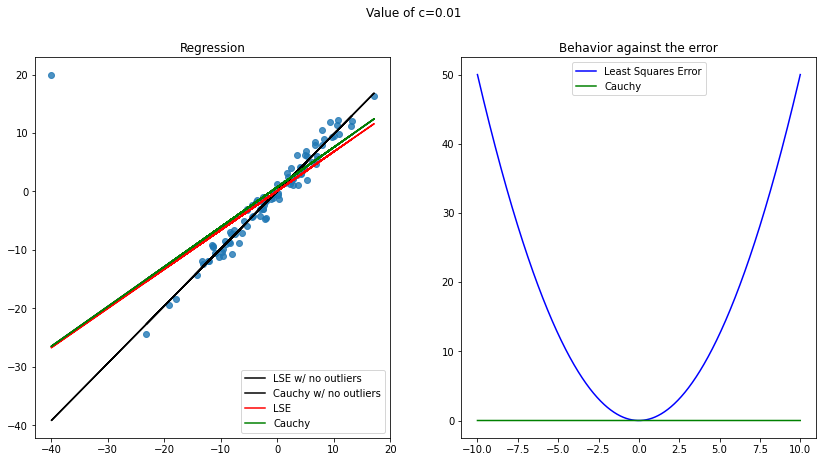

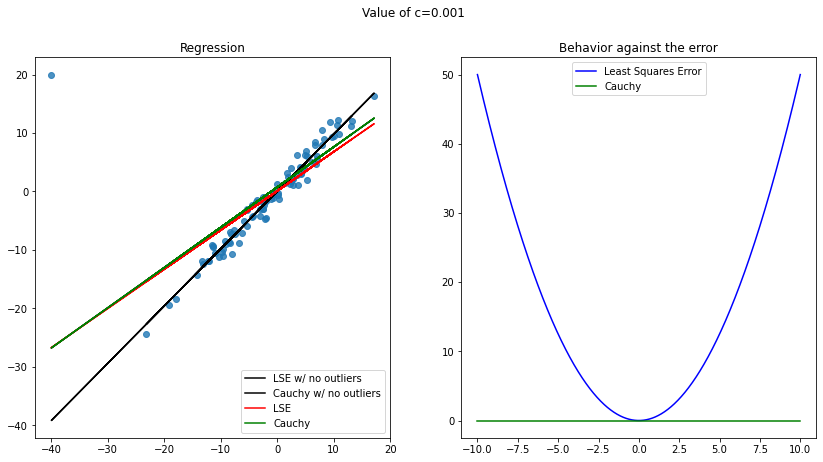

In [ ]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1, 100, 1/100, 1/1000]    

for i in range(0, len(c)):
  # Run the method on the dataset with no outliers -----------------------------
  x = np.copy(x_no)
  y = np.copy(y_no)

  wk1_no, k1_no = grad_des_LSE()
  wk2_no, k2_no = grad_des_Cauchy(c=c[i])

  # Change the values of one of the points to be an outlier --------------------
  points[1] = [-40, 20]
  x[1] = -40
  y[1] = 20

  # Run the method on  the dataset with one outlier ----------------------------
  wk1, k1 = grad_des_LSE()
  wk2, k2 = grad_des_Cauchy(c=c[i])

  # Plot the obtained regression -----------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.scatter(x, y, alpha=0.8)
  ax1.plot(x, wk1_no[0,-1]*x+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  ax1.plot(x, wk2_no[0,-1]*x+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  ax1.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
  ax1.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
  ax1.legend()
  ax1.set_title("Regression")

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.legend(['Least Squares Error', 'Cauchy'])
  ax2.set_title("Behavior against the error")

OBSERVATIONS: </br>
*   Comparing the plots we can see that the regression obtained with the Cauchy function is more robust in the presence of one outlier when its behavior is less steep with higher values of the error, meaning these values have a lower weight on the loss function (as previously noted).
*   In particular, when c=100, the behavior of the Cauchy function is almost the same as that of the least squares error function. It approximates a quadratic function and, as one would expect, the linear regression with c=100 is not robust, approximating the distribution almost as poorly as the linear regression obtained with the least squares loss function.

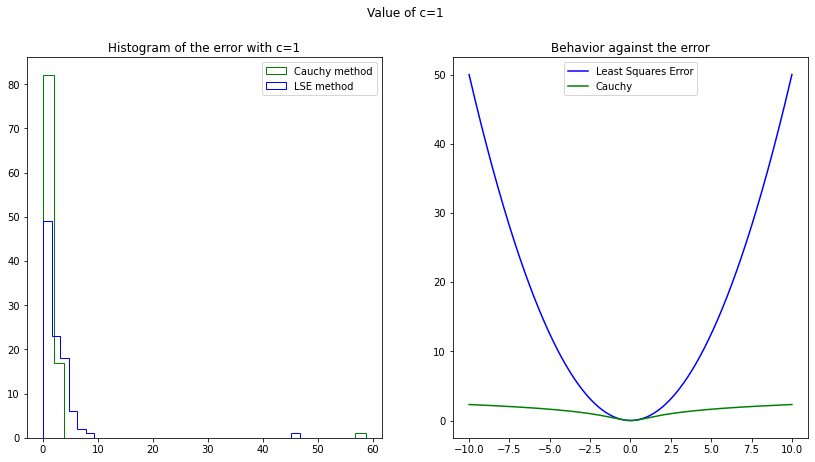

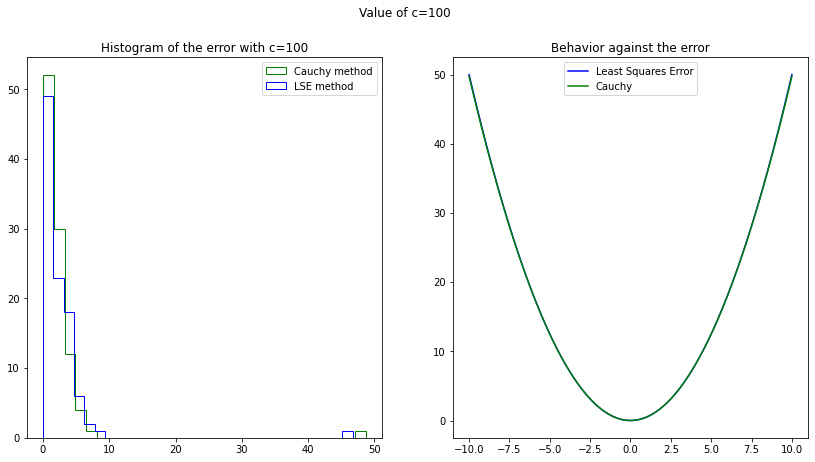

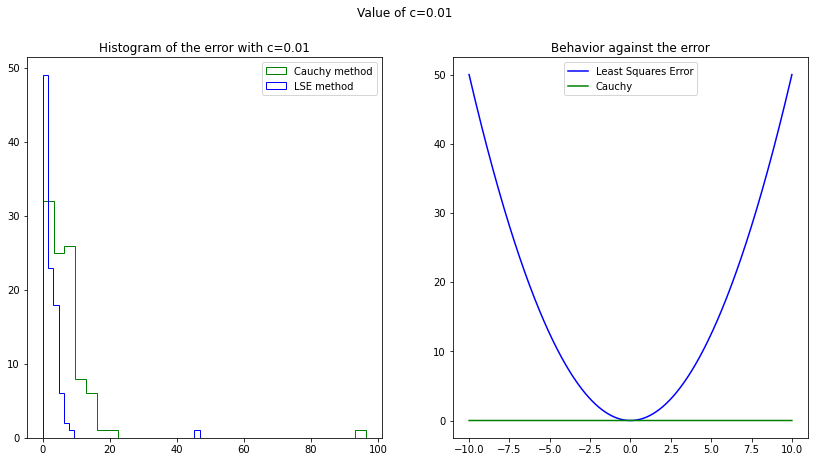

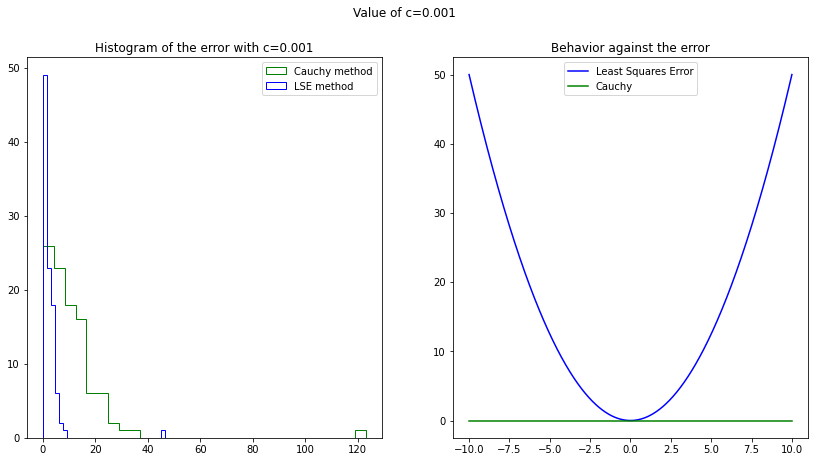

In [ ]:
c = [1, 100, 1/100, 1/1000]         

weights = np.zeros([2,len(c)])      # Initiate a matrix to store the obtained weights of the methods

for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(c=c[i])
  wkLSE, kLSE = grad_des_LSE()
  
  weights[0,i] = wk[0,-1]           # Store the weights of the methods, these will later be used
  weights[1,i] = wk[1,-1]

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.hist(np.abs(wk[0,-1]*x+wk[1,-1] - y), bins=30, color='g', histtype='step', label='Cauchy method')
  ax1.hist(np.abs(wkLSE[0,-1]*x+wkLSE[1,-1] - y), bins=30, color='b', histtype='step', label='LSE method')
  ax1.set_title("Histogram of the error with c=" + str(c[i]))
  ax1.legend()

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.set_title("Behavior against the error")
  ax2.legend(['Least Squares Error', 'Cauchy'])

Let's compare the histograms of the Cauchy regressions for different values of c in more detail. 

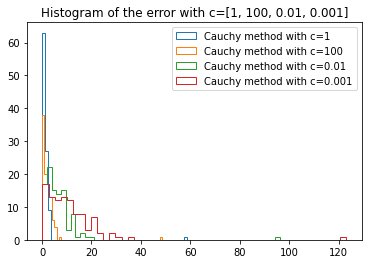

In [ ]:
for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(c=c[i])
  wkLSE, kLSE = grad_des_LSE()

  labeli = 'Cauchy method with c=' + str(c[i])
  plt.hist(np.abs(wk[0,-1]*x+wk[1,-1] - y), bins=50, histtype='step', label=labeli)

plt.title("Histogram of the error with c=[1, 100, 0.01, 0.001]")
plt.legend()

## Robust functions - part 6

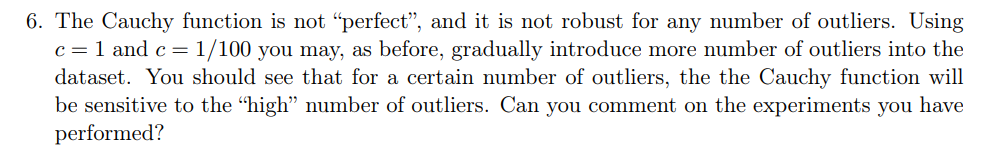

Let's now focus on two values of c: c=1 and c=1/100

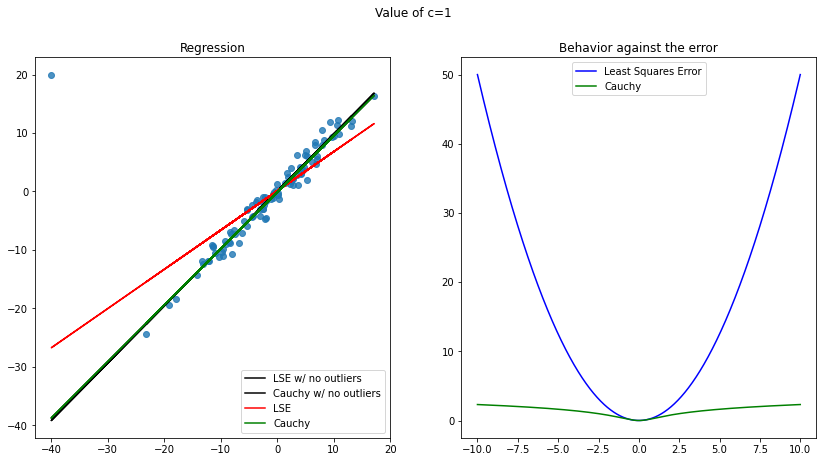

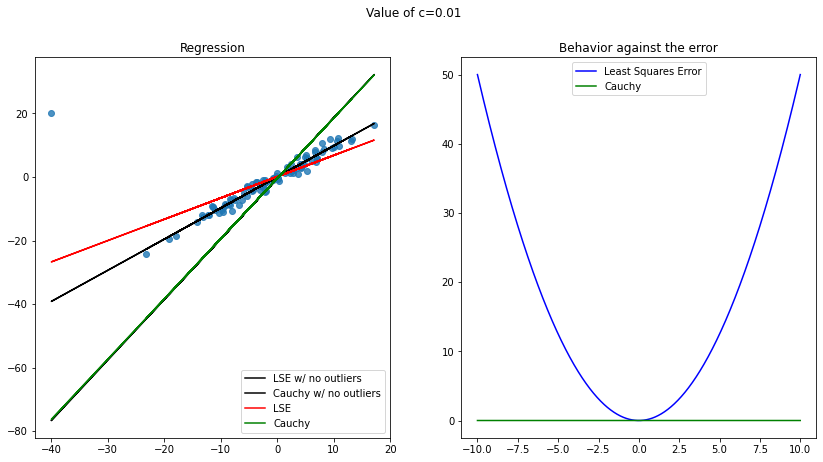

In [ ]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1,1/100]    

for i in range(0, len(c)):
# Run the method on the dataset with no outliers -----------------------------
  x = np.copy(x_no)
  y = np.copy(y_no)

  wk1_no, k1_no = grad_des_LSE()
  wk2_no, k2_no = grad_des_Cauchy(c=c[i])

  # Change the values of one of the points to be an outlier --------------------
  points[1] = [-40, 20]
  x[1] = -40
  y[1] = 20

  # Run the method on  the dataset with one outlier ----------------------------
  w0 = np.zeros([2,1])     # Initialize the weights
  wk1, k1 = grad_des_LSE()
  wk2, k2 = grad_des_Cauchy(c=c[i])

  # Plot the obtained regression -----------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.scatter(x, y, alpha=0.8)
  ax1.plot(x, wk1_no[0,-1]*x+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  ax1.plot(x, wk2_no[0,-1]*x+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  ax1.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='LSE')
  ax1.plot(x, wk2[0,-1]*x+wk2[1,-1], c='g', label='Cauchy')
  ax1.legend()
  ax1.set_title("Regression")

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.legend(['Least Squares Error', 'Cauchy'])
  ax2.set_title("Behavior against the error")

OBSERVATION: at first sight, the two values gave better linear regressions than the one obatined with the least squares method. Both of the regression improve the result compared to the regression obtained using LSE, as one would expect considering that the plots of the behaviour of the two Cauchy functions against the error show they are less sensible to larger values, compared to the behavior of the LSE function

We will now study the performance of the two methods when more outliers are present. To do so, for a less clustered visualization, in the following sections we will not consider the linear regressions obtained with the least squares method

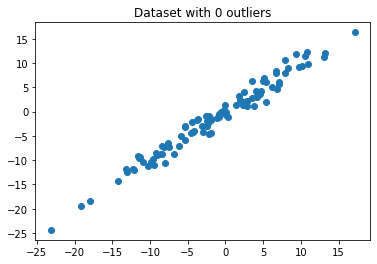

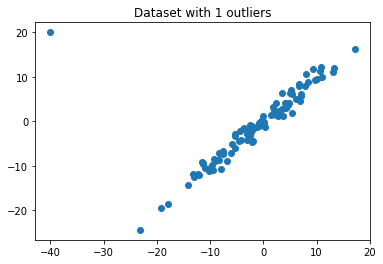

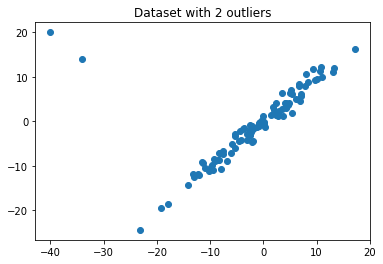

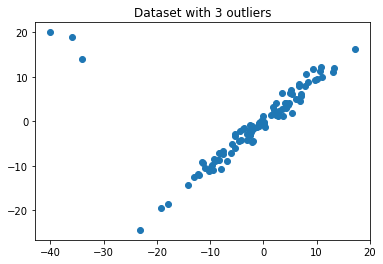

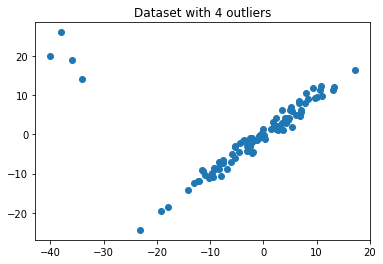

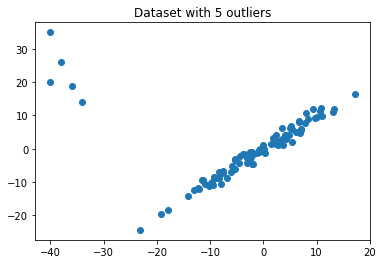

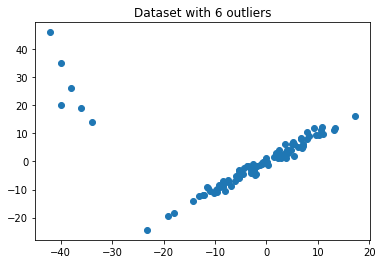

In [ ]:
# Generate more outliers in the dataset ----------------------------------------
N = 6                           # Number of points changed to outliers 
n = int(len(x)/(N+1))             

X = np.zeros([len(x),N+1])      # Initiate matrices to store the values of the dataset for different numbers of outliers
Y = np.zeros([len(y),N+1])      # The j-th column will correspond to the coordinates of the dateset with i outliers

X[:,[0]] = x_no         # The original dataset with no outliers
Y[:,[0]] = y_no
X[:,[1]] = x            # The current dataset with one outlier
Y[:,[1]] = y

plt.figure()
plt.scatter(X[:,[0]], Y[:,[0]])
plt.title("Dataset with 0 outliers")
plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]])
plt.title("Dataset with 1 outliers")

for j in range(2, N+1):
  x[j*n] = -30 - 2*j 
  y[j*n] = 10 + (j**2)
  X[:,[j]] = x
  Y[:,[j]] = y

  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

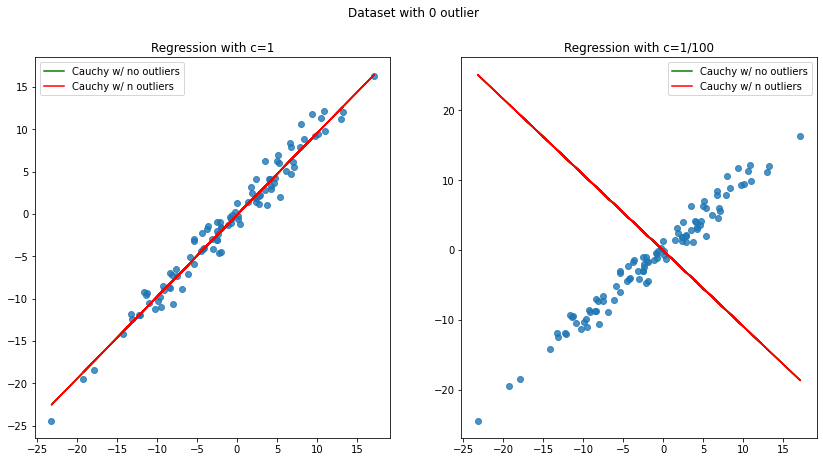

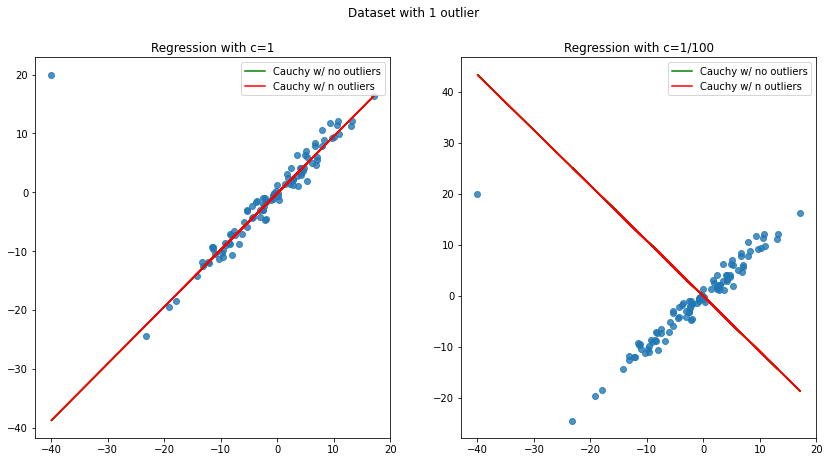

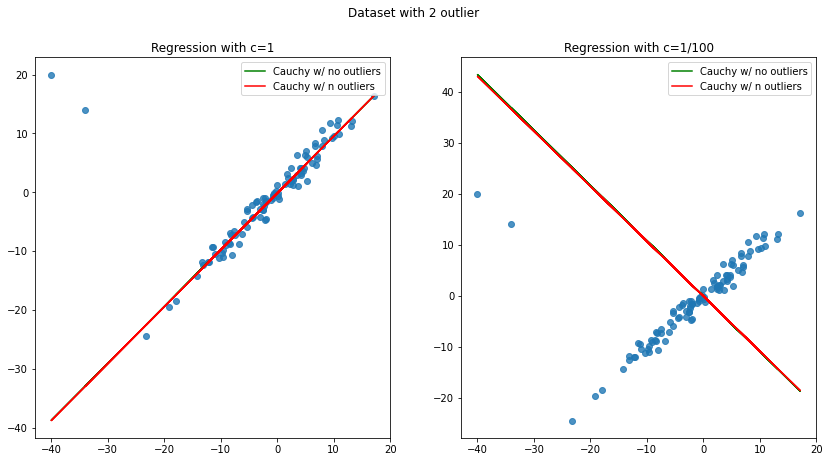

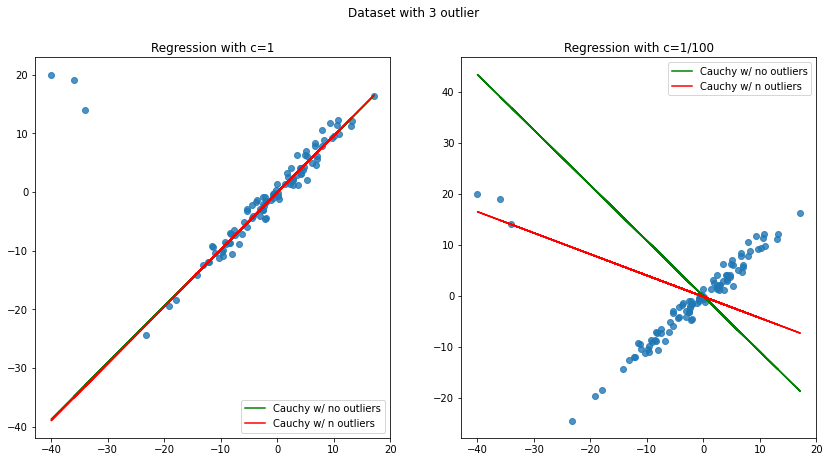

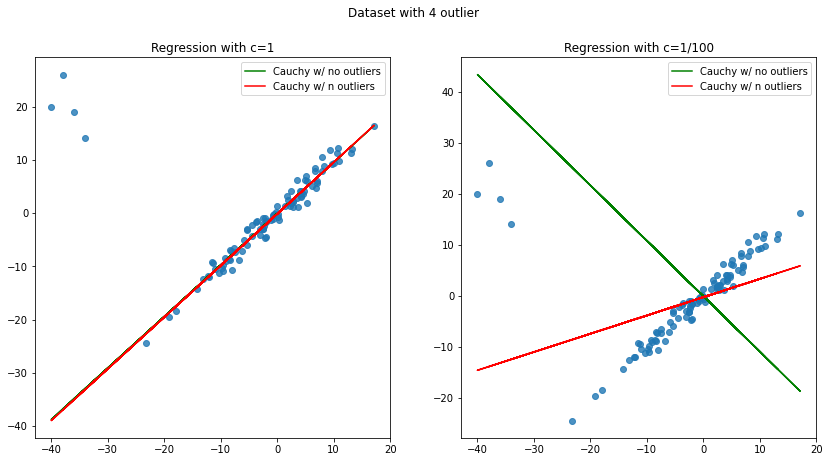

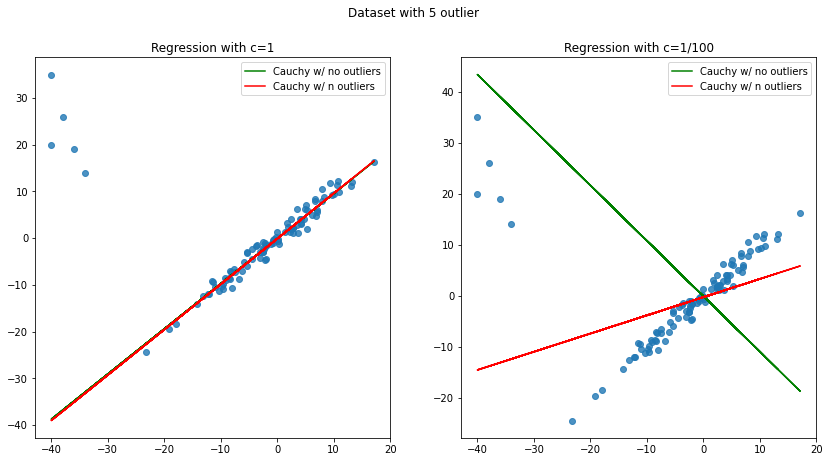

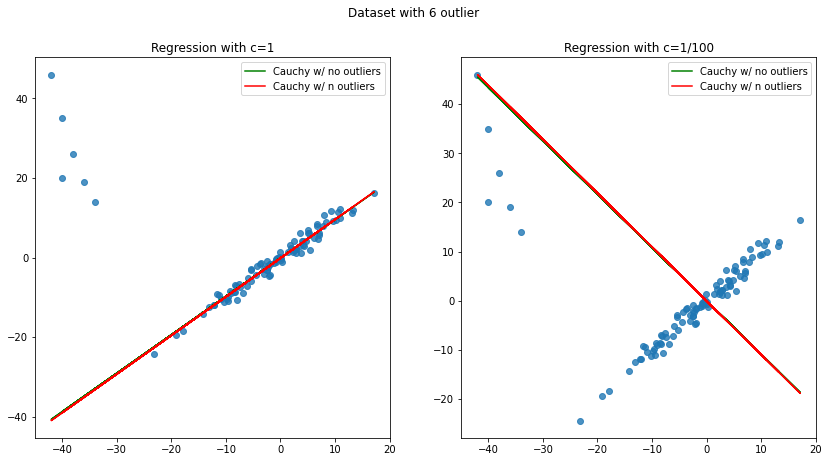

In [ ]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1,1/100]    

for j in range(0, X.shape[1]):
  x = np.copy(X[:,[0]])
  y = np.copy(Y[:,[0]])

  # Run the method with c[i] and no outliers -----------------------------------
  wk1_no, k1_no = grad_des_Cauchy(c=c[0], x=X[:,[0]])
  wk2_no, k2_no = grad_des_Cauchy(c=c[1], y=Y[:,[0]])

  x = np.copy(X[:,[j]])
  y = np.copy(Y[:,[j]])

  # Run the method with c[i] and j outliers ----------------------------------
  wk1, k1 = grad_des_Cauchy(c=c[0], x=X[:,[j]])
  wk2, k2 = grad_des_Cauchy(c=c[1], y=Y[:,[j]])

  # Plot the obtained regression ---------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Dataset with " + str(j) + " outlier")
  ax1.scatter(x, y, alpha=0.8)
  ax1.plot(x, wk1_no[0,-1]*x+wk1_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax1.plot(x, wk1[0,-1]*x+wk1[1,-1], c='r', label='Cauchy w/ n outliers')
  ax1.legend()
  ax1.set_title("Regression with c=1")

  # Plot the functions ---------------------------------------------------------
  ax2.scatter(x, y, alpha=0.8)
  ax2.plot(x, wk2_no[0,-1]*x+wk2_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax2.plot(x, wk2[0,-1]*x+wk2[1,-1], c='r', label='Cauchy w/ n outliers')
  ax2.legend()
  ax2.set_title("Regression with c=1/100")

OBSERVATIONS: </br>


*   The method with c=1 seems very robust until there are 3 or less outliers, but as soon as a fourth one is added to the dataset the method obtains a much worse result
*   The method with c=1/100 seems to be less robust compared to the one using c=1; it obtaines in general worse results, and, in particular, its approximation of the distribution could be considered not good already with 3 outliers present

